In [ ]:
#para convertir a númerico
#bathrooms['bathrooms']= pd.to_numeric(bathrooms['bathrooms'])

#para unir los datos
#datos = datos.join(bathrooms)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Modulo 6"

/content/drive/MyDrive/Colab Notebooks/Modulo 6


In [ ]:
datos = pd.read_csv("Employees.csv")
datos.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [ ]:
#Dimensión de datos
datos.shape

(7000, 17)

In [ ]:
#Eliminamos la columna Employee_ID, porque no nos aportaria saber el ID de del empleado para un analisis general 
datos = datos.drop(['Employee_ID'], axis = 1)

In [ ]:
pd.isna(datos).sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

In [ ]:
#datos['Age'].value_counts()
datos['Age'].describe()

count    6588.000000
mean       39.622799
std        13.606920
min        19.000000
25%        27.000000
50%        37.000000
75%        52.000000
max        65.000000
Name: Age, dtype: float64

In [ ]:
#datos['Time_of_service'].value_counts()
datos['Time_of_service'].describe()

count    6856.000000
mean       13.385064
std        10.364188
min         0.000000
25%         5.000000
50%        10.000000
75%        21.000000
max        43.000000
Name: Time_of_service, dtype: float64

In [ ]:
 datos['Work_Life_balance'].value_counts()

1.0    2042
3.0    2023
2.0    1615
4.0    1197
5.0     112
Name: Work_Life_balance, dtype: int64

In [ ]:
datos['Pay_Scale'].value_counts()

8.0     1392
6.0     1284
5.0     1160
4.0      983
7.0      811
9.0      464
2.0      277
3.0      255
10.0     209
1.0      156
Name: Pay_Scale, dtype: int64

In [ ]:
#Age - imputar con promedio o con la media, en este caso iremos por el promedio
datos['Age'].fillna(datos['Work_Life_balance'].mean(), inplace=True)
#datos['Age'].fillna(datos['Work_Life_balance'].median(), inplace=True)

In [ ]:
#Time_of_service - imputar con promedio, para un analisis más conservador
datos['Time_of_service'].fillna(datos['Time_of_service'].mean(), inplace=True)

In [ ]:
#Work_Life_balance - imputar con moda o con percentiles, porque son pocos valores que faltan
datos['Work_Life_balance'].fillna(datos['Work_Life_balance'].value_counts().idxmax(), inplace=True)

In [ ]:
#Pay_Scale - imputar con moda, , porque son pocos valores que faltan
datos['Pay_Scale'].fillna(datos['Pay_Scale'].quantile(0.75), inplace=True)
#datos['Pay_Scale'].fillna(datos['Pay_Scale'].value_counts().idxmax(), inplace=True)

In [ ]:
datos.isnull().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

In [ ]:
#Vemos los tipos de datos que existen en las columnas con etiquetas 
datos['Gender'].unique()	

array(['F', 'M'], dtype=object)

In [ ]:
datos['Relationship_Status'].unique()	

array(['Married', 'Single'], dtype=object)

In [ ]:
datos['Hometown'].unique()

array(['Franklin', 'Springfield', 'Clinton', 'Lebanon', 'Washington'],
      dtype=object)

In [ ]:
datos['Unit'].unique()

array(['IT', 'Logistics', 'Quality', 'Human Resource Management',
       'Purchasing', 'Sales', 'Production', 'Operarions',
       'Accounting and Finance', 'Marketing', 'R&D', 'Security'],
      dtype=object)

In [ ]:
datos['Decision_skill_possess'].unique()

array(['Conceptual', 'Analytical', 'Behavioral', 'Directive'],
      dtype=object)

In [ ]:
#podemos observar 2 valores atipicos, la edad minima es de 2 años, y el tiempo desde la promoción es 0
datos.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,37.431259,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.008857,2.385714,0.189376
std,15.844852,1.065102,10.257016,1.149395,15.761406,0.648205,1.163721,2.058352,1.123250,0.185753
min,2.387895,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,26.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,0.070400
50%,36.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,0.995900


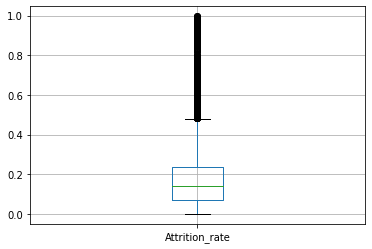

In [ ]:
#Generamos una tabla para visualizar Attrition_rate
boxplot = datos.boxplot(column=['Attrition_rate'])
boxplot

In [ ]:
# DESVIACIÓN ESTÁNDAR
#Detección con desviación estándar (Distancia de observación a la media > X*Desviación Estándar -> Valor atípico)
#If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
#There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.

factor = 3 #probar con 2 y 3
upper_lim = datos['Attrition_rate'].mean() + datos['Attrition_rate'].std()*factor
print(upper_lim)
lower_lim = datos['Attrition_rate'].mean() - datos['Attrition_rate'].std()*factor
print(lower_lim)

# Valores que están fuera de estos límites

datos2 = datos[(datos['Attrition_rate'] < upper_lim) & (datos['Attrition_rate'] > lower_lim)]
datos2.shape 

0.7466359619335733
-0.3678837047907161


(6791, 16)

Delimitamos el tope a 0.7466359619335733 y el mínimo -0.3678837047907161

(array([141., 130., 128., 137., 126., 114., 135., 121., 118., 132., 113.,
        116., 119., 108.,  98., 117., 116., 131., 125., 112., 130., 124.,
        119., 128., 104., 139., 119., 121., 123., 118., 126., 137., 113.,
        124., 128., 120., 121., 113., 127., 121.,  23.,   0.,  64.,  77.,
         69.,  53.,  56.,  76.,  56.,  65.,  69.,  70.,  78.,  65.,  73.,
         64.,  57.,  55.,  57.,  68.,  23.,   0.,   9.,   8.,   9.,   6.,
         10.,  10.,   3.,  11.,   9.,   5.,   8.,   9.,  11.,   7.,   4.,
         18.,   5.,   4.,  15.,   9.,   5.,   9.,   8.,  14.,   5.,   6.,
          8.,  16.,   5.,   5.,   7.,   8.,   9.,  10.,   7.,   5.,  13.,
          4.,  12.,   8.,   5.,   8.,   6.,   2.,  16.,   7.,   4.,  13.,
          6.,   7.,   6.,   8.,   7.,   9.,  15.,   7.,   9.,   6.,   5.,
          8.,   9.,   1.,   7.,   7.,  10.,   2.,  10.,   5.,   9.,   7.,
          5.,   4.,   2.,   8.,   5.,   8.,   6.,   9.,   6.,   7.,  10.,
          9.,   6.,   7.,   6.,   9., 

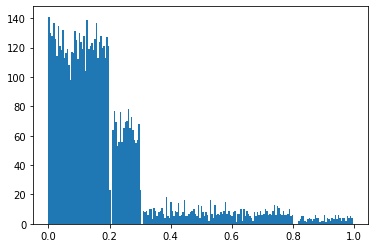

In [ ]:
import matplotlib.pyplot as plt
plt.hist(datos.Attrition_rate, bins = 200)

Obtenemos una tabla, que no esta tan mal pero todavia se puede mejorar

In [ ]:
datos['Attrition_rate'].describe()

count    7000.000000
mean        0.189376
std         0.185753
min         0.000000
25%         0.070400
50%         0.142650
75%         0.235000
max         0.995900
Name: Attrition_rate, dtype: float64

In [ ]:
upper_lim = datos['Attrition_rate'].quantile(.70)
print(upper_lim)
lower_lim = datos['Attrition_rate'].quantile(.10)
print(lower_lim)

datos = datos[(datos['Attrition_rate'] < upper_lim) & (datos['Attrition_rate'] > lower_lim)]
datos.shape

0.1995
0.0267


(4193, 16)

(array([214., 213., 209., 206., 195., 193., 200., 212., 218., 204., 214.,
        219., 209., 209., 208., 225., 216., 206., 209., 214.]),
 array([0.0268 , 0.03543, 0.04406, 0.05269, 0.06132, 0.06995, 0.07858,
        0.08721, 0.09584, 0.10447, 0.1131 , 0.12173, 0.13036, 0.13899,
        0.14762, 0.15625, 0.16488, 0.17351, 0.18214, 0.19077, 0.1994 ]),
 <a list of 20 Patch objects>)

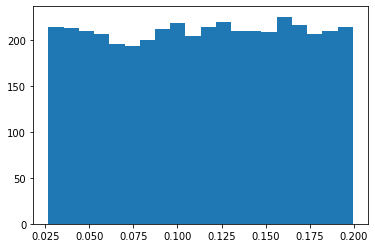

In [ ]:
plt.hist(datos.Attrition_rate, bins = 20)

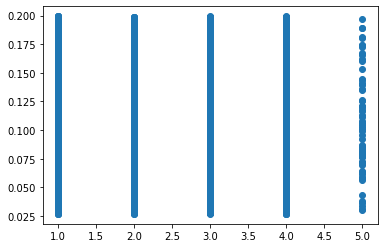

In [ ]:
plt.scatter(x=datos.Work_Life_balance, y=datos.Attrition_rate)

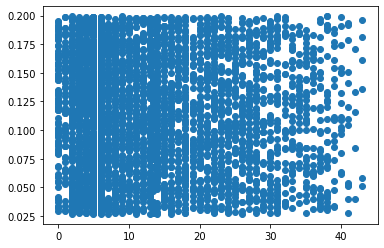

In [ ]:
plt.scatter(x=datos.Time_of_service, y=datos.Attrition_rate)

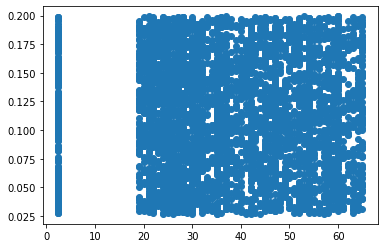

In [ ]:
plt.scatter(x=datos.Age, y=datos.Attrition_rate)

In [ ]:
# VARIABLE Y
## SESGO
datos['Attrition_rate'].skew()
# sesgo a la derecha y no pareciera una distribución normal

-0.02701925251407792

(array([ 76., 106.,  80.,  90.,  75.,  81.,  94.,  80.,  75.,  85.,  83.,
         77.,  65.,  74.,  89.,  69.,  89.,  89.,  82.,  83.,  84.,  82.,
        101.,  78.,  77., 101.,  80.,  67.,  90.,  95.,  84.,  86.,  67.,
         99.,  82.,  93.,  82.,  83., 106.,  69.,  92.,  77.,  94.,  77.,
         82.,  82.,  80.,  95.,  76.,  90.]),
 array([0.0268  , 0.030252, 0.033704, 0.037156, 0.040608, 0.04406 ,
        0.047512, 0.050964, 0.054416, 0.057868, 0.06132 , 0.064772,
        0.068224, 0.071676, 0.075128, 0.07858 , 0.082032, 0.085484,
        0.088936, 0.092388, 0.09584 , 0.099292, 0.102744, 0.106196,
        0.109648, 0.1131  , 0.116552, 0.120004, 0.123456, 0.126908,
        0.13036 , 0.133812, 0.137264, 0.140716, 0.144168, 0.14762 ,
        0.151072, 0.154524, 0.157976, 0.161428, 0.16488 , 0.168332,
        0.171784, 0.175236, 0.178688, 0.18214 , 0.185592, 0.189044,
        0.192496, 0.195948, 0.1994  ]),
 <a list of 50 Patch objects>)

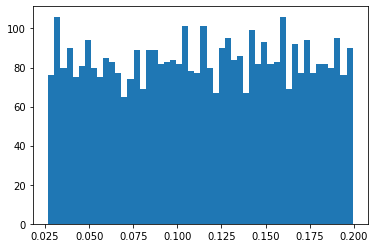

In [ ]:
plt.hist(datos.Attrition_rate, bins = 50)

In [ ]:
import numpy as np

#rango de valores muy amplio - una cola de la distribución muy notoria, para reducir este sesgo aplicamos esta distribición, nos permite tener nuestros datos en un rango más delimitado
datos['log+1'] = (datos['Attrition_rate']+1).transform(np.log) #+1 porque log(0) no existe
datos

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,log+1
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841,0.168983
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670,0.064851
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851,0.081672
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668,0.064664
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827,0.167800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,F,45.0,1,Single,Lebanon,Operarions,Analytical,15.0,1,51,2,3,3.0,type3,2.0,0.1218,0.114935
6988,F,38.0,3,Married,Washington,Logistics,Behavioral,14.0,3,23,0,1,4.0,type2,3.0,0.0884,0.084709
6994,M,33.0,3,Married,Springfield,Accounting and Finance,Behavioral,9.0,3,34,0,1,8.0,type2,4.0,0.0480,0.046884
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,0.1055,0.100298


(array([397., 399., 362., 409., 425., 413., 442., 454., 444., 448.]),
 array([0.02644717, 0.0419846 , 0.05752202, 0.07305945, 0.08859687,
        0.1041343 , 0.11967173, 0.13520915, 0.15074658, 0.16628401,
        0.18182143]),
 <a list of 10 Patch objects>)

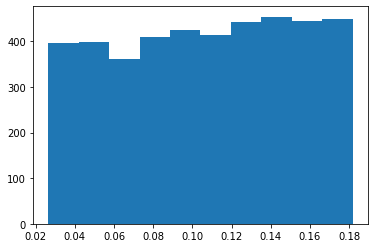

In [ ]:
#para verificar en un histograma, vizualimos esta mas distribuido a la derecha
plt.hist(datos['log+1'], bins = 10)

In [ ]:
datos.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate,log+1
count,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000
mean,37.504513,3.183639,13.435166,2.373957,46.978774,0.815407,2.797758,6.018602,2.376580,0.113620,0.106611
std,15.769013,1.060727,10.234726,1.143730,15.712766,0.646689,1.168783,2.058458,1.122546,0.049873,0.044875
min,2.387895,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.026800,0.026447
25%,26.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,0.070500,0.068126
50%,37.000000,3.000000,11.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,0.114200,0.108137
75%,51.000000,4.000000,21.000000,3.000000,61.000000,1.000000,4.000000,8.000000,3.000000,0.157000,0.145830
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,0.199400,0.181821


In [ ]:
datos

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,log+1
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841,0.168983
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670,0.064851
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851,0.081672
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668,0.064664
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827,0.167800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,F,45.0,1,Single,Lebanon,Operarions,Analytical,15.0,1,51,2,3,3.0,type3,2.0,0.1218,0.114935
6988,F,38.0,3,Married,Washington,Logistics,Behavioral,14.0,3,23,0,1,4.0,type2,3.0,0.0884,0.084709
6994,M,33.0,3,Married,Springfield,Accounting and Finance,Behavioral,9.0,3,34,0,1,8.0,type2,4.0,0.0480,0.046884
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,0.1055,0.100298


In [ ]:
datos.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
Attrition_rate               float64
log+1                        float64
dtype: object

In [ ]:
## La estandarización y la normalización se utilizan para el escalado de características 
## (escalar las características a un rango específico en lugar de estar en un rango grande, lo cual es muy complejo de comprender para el modelo)

### Estandarización: Este concepto se refiere a hacer que la distribución de datos sea normal. Transforma la media de los datos en 0 y su varianza en 1. ##MÁS COMÚN
### Normalización: Este concepto se refiere a transformar los datos en el rango [0, 1]. cada uno de los registros de datos en el conjunto de datos 
### se transformará en el rango entre 0 y 1, de modo que los datos caigan dentro de un rango estrecho que ayuda al modelo a aprender.


# Estandarización

#columns = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'Attrition_rate', 'log+1']
columns = ['Attrition_rate','log+1','Compensation_and_Benefits', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Gender']
categoricas = pd.DataFrame(datos, columns=columns) #variables categoricas y variable respuesta (y) 

numericas = datos.drop(['Attrition_rate','log+1','Compensation_and_Benefits', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Gender'], axis = 1)
#numericas = datos.drop(['Attrition_rate', 'Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance','log+1'], axis = 1)


from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(numericas)
scaled

array([[ 0.28511761,  0.76971518, -0.92198766, ..., -1.53832858,
         0.47682033,  0.55542871],
       [-0.85649768, -0.17314656, -0.82426943, ...,  0.17305686,
        -0.00903815,  1.44636696],
       [ 1.29988675, -0.17314656,  1.32553154, ..., -0.68263586,
         0.96267881, -1.22644779],
       ...,
       [-0.28569004, -0.17314656, -0.43339653, ..., -1.53832858,
         0.96267881,  1.44636696],
       [ 0.41196375, -2.05887005,  0.25063105, ..., -0.68263586,
        -0.98075511,  0.55542871],
       [ 1.29988675, -0.17314656,  0.83694041, ...,  1.02874959,
        -0.49489663,  0.55542871]])

In [ ]:
numericas = pd.DataFrame(scaled)
numericas.columns = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance'] 
numericas

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance
0,0.285118,0.769715,-0.921988,1.421871,-0.889751,0.285478,-1.538329,0.476820,0.555429
1,-0.856498,-0.173147,-0.824269,1.421871,-0.698800,-1.261044,0.173057,-0.009038,1.446367
2,1.299887,-0.173147,1.325532,0.547435,0.255951,-1.261044,-0.682636,0.962679,-1.226448
3,-0.729652,-0.173147,-0.921988,0.547435,0.574202,0.285478,0.173057,0.962679,-1.226448
4,-0.412536,-2.058870,-0.824269,1.421871,0.956103,0.285478,0.173057,-1.952472,0.555429
...,...,...,...,...,...,...,...,...,...
4188,0.475387,-2.058870,0.152913,-1.201437,0.255951,1.831999,0.173057,-1.466614,-0.335510
4189,0.031425,-0.173147,0.055195,0.547435,-1.526252,-1.261044,-1.538329,-0.980755,0.555429
4190,-0.285690,-0.173147,-0.433397,0.547435,-0.826100,-1.261044,-1.538329,0.962679,1.446367
4191,0.411964,-2.058870,0.250631,-0.327001,0.765152,-1.261044,-0.682636,-0.980755,0.555429


In [ ]:
numericas.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance
count,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03
mean,-3.134997e-16,-1.330255e-16,-3.558645e-17,1.592917e-16,-1.067593e-16,3.389185e-18,1.575971e-16,-1.525133e-17,5.253237e-17
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-2.227204e+00,-2.058870e+00,-1.312861e+00,-2.075874e+00,-1.717202e+00,-1.261044e+00,-1.538329e+00,-2.438331e+00,-1.226448e+00
25%,-7.296515e-01,-1.731466e-01,-8.242694e-01,-1.201437e+00,-8.897505e-01,-1.261044e+00,-6.826359e-01,-4.948966e-01,-1.226448e+00
50%,-3.199775e-02,-1.731466e-01,-2.379601e-01,-3.270012e-01,1.351028e-03,2.854777e-01,1.730569e-01,-9.038150e-03,-3.355095e-01
75%,8.559253e-01,7.697152e-01,7.392222e-01,5.474350e-01,8.924526e-01,2.854777e-01,1.028750e+00,9.626788e-01,5.554287e-01
max,1.743848e+00,1.712577e+00,2.889023e+00,1.421871e+00,1.719904e+00,1.831999e+00,1.884442e+00,1.934396e+00,2.337305e+00


In [ ]:
numericas = numericas.round(2)

#PCA

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pca_model = PCA(n_components = 9) #10 porque son 9 variables

In [ ]:
pca_model.fit(numericas)

PCA(n_components=9)

In [ ]:
pca_model.components_

array([[ 0.68491623, -0.01121166,  0.68687523,  0.23930275,  0.02100285,
         0.0248708 , -0.0132938 ,  0.02086598,  0.00537333],
       [ 0.02267446, -0.21489393,  0.04013925, -0.24313583, -0.00650898,
         0.50323471,  0.63528558,  0.45932134, -0.15725418],
       [ 0.00112399, -0.64562   ,  0.00634179, -0.07926213,  0.1148957 ,
         0.22901518, -0.06401964, -0.28139907,  0.65415436],
       [ 0.04339862,  0.019076  ,  0.05838641, -0.22081356, -0.77060249,
        -0.33531661,  0.04834001,  0.30444231,  0.37986545],
       [-0.04699599,  0.01318498, -0.04320719,  0.2125004 ,  0.53602147,
        -0.46011432,  0.15187329,  0.54863987,  0.35706981],
       [-0.06688915, -0.66806415, -0.03220266,  0.24018647, -0.14372557,
        -0.14015334, -0.37166614,  0.33261541, -0.44879935],
       [ 0.11101142, -0.27636632,  0.09597578, -0.50731112,  0.15810329,
        -0.57352745,  0.32917542, -0.32945266, -0.27183874],
       [-0.11248748, -0.11513335, -0.09490999,  0.68420802, -0

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = numericas.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance
PC1,0.684916,-0.011212,0.686875,0.239303,0.021003,0.024871,-0.013294,0.020866,0.005373
PC2,0.022674,-0.214894,0.040139,-0.243136,-0.006509,0.503235,0.635286,0.459321,-0.157254
PC3,0.001124,-0.645620,0.006342,-0.079262,0.114896,0.229015,-0.064020,-0.281399,0.654154
PC4,0.043399,0.019076,0.058386,-0.220814,-0.770602,-0.335317,0.048340,0.304442,0.379865
PC5,-0.046996,0.013185,-0.043207,0.212500,0.536021,-0.460114,0.151873,0.548640,0.357070
PC6,-0.066889,-0.668064,-0.032203,0.240186,-0.143726,-0.140153,-0.371666,0.332615,-0.448799
PC7,0.111011,-0.276366,0.095976,-0.507311,0.158103,-0.573527,0.329175,-0.329453,-0.271839
PC8,-0.112487,-0.115133,-0.094910,0.684208,-0.243519,-0.144773,0.565892,-0.310234,-0.014231
PC9,-0.704863,0.019704,0.708533,-0.015063,0.014599,-0.003170,-0.002930,-0.017174,0.002835


In [ ]:
# Porcentaje de varianza explicada acumulada ¿Con cuántos componentes se quedarían? 
# ==============================================================================
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum) #propuestas distintas - 85% 95%  - poco poder computacional 75%

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.19830986 0.31806506 0.43272724 0.54625033 0.65467082 0.7628376
 0.86788729 0.97072708 1.        ]


In [ ]:
proyecciones = np.dot(pca_model.components_, scale(numericas).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
proyecciones = proyecciones.transpose().set_index(numericas.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.080277,-1.236583,-0.322394,0.532787,-0.042381,0.406751,-2.111939,0.084578,-0.878558
1,-0.851110,-1.115494,0.559229,1.114665,1.117647,0.100973,-0.567164,1.598863,-0.002410
2,1.933574,-0.449426,-1.211465,0.026336,0.702481,1.378262,0.598225,-0.421768,0.004599
3,-0.967914,0.732882,-0.891831,-0.910620,0.477057,1.008419,-0.403072,0.201563,-0.162372
4,-0.493731,-0.682206,2.291688,-1.628564,-0.134265,0.629860,0.259093,1.752312,-0.306536
...,...,...,...,...,...,...,...,...,...
4188,0.183559,1.155467,2.056948,-1.126389,-1.915363,0.356755,0.871896,-0.421692,-0.232674
4189,0.134712,-2.236793,0.341976,1.320931,-0.701162,0.634668,-0.076097,0.367208,0.014269
4190,-0.360960,-1.515883,0.452757,1.667290,1.092162,0.819022,-0.928829,-0.335722,-0.128097
4191,0.372771,-1.068569,1.842533,-0.223359,0.423982,1.003868,1.599970,-0.150999,-0.111755


In [ ]:
conjunto_1 = proyecciones[['PC1', 'PC2', 'PC3', 'PC4']]
conjunto_1.head()

,PC1,PC2,PC3,PC4
0,-0.080277,-1.236583,-0.322394,0.532787
1,-0.851110,-1.115494,0.559229,1.114665
2,1.933574,-0.449426,-1.211465,0.026336
3,-0.967914,0.732882,-0.891831,-0.910620
4,-0.493731,-0.682206,2.291688,-1.628564


In [ ]:
categoricas2 = categoricas.iloc[:,3:10]
#categoricas2

categoricas2 = pd.get_dummies(categoricas2, drop_first=True)

In [ ]:
categoricas2

,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Gender_M
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6988,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6994,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6996,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
categoricas2 = categoricas2.reset_index()
# cuando eliminamos valores en valores atípicos nuestros índices se movieron - cuidado

In [ ]:
categoricas2

,index,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Gender_M
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,6987,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4189,6988,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4190,6994,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4191,6996,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
todas_las_x = categoricas2.join(conjunto_1)

In [ ]:
todas_las_x

,index,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Gender_M,PC1,PC2,PC3,PC4
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,-0.080277,-1.236583,-0.322394,0.532787
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,-0.851110,-1.115494,0.559229,1.114665
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.933574,-0.449426,-1.211465,0.026336
3,3,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,-0.967914,0.732882,-0.891831,-0.910620
4,4,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,-0.493731,-0.682206,2.291688,-1.628564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,6987,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.183559,1.155467,2.056948,-1.126389
4189,6988,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0.134712,-2.236793,0.341976,1.320931
4190,6994,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,-0.360960,-1.515883,0.452757,1.667290
4191,6996,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.372771,-1.068569,1.842533,-0.223359


In [ ]:
y_s = categoricas[['Attrition_rate', 'log+1']]

In [ ]:
y_s

,Attrition_rate,log+1
0,0.1841,0.168983
1,0.0670,0.064851
2,0.0851,0.081672
3,0.0668,0.064664
4,0.1827,0.167800
...,...,...
6987,0.1218,0.114935
6988,0.0884,0.084709
6994,0.0480,0.046884
6996,0.1055,0.100298


In [ ]:
y_s = y_s.reset_index()
y_s = y_s[['Attrition_rate', 'log+1']]

In [ ]:
datos1 = todas_las_x.join(y_s)

In [ ]:
datos1 = datos1.drop(['index'], axis=1)

In [ ]:
datos1

,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,...,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Gender_M,PC1,PC2,PC3,PC4,Attrition_rate,log+1
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,-0.080277,-1.236583,-0.322394,0.532787,0.1841,0.168983
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,-0.851110,-1.115494,0.559229,1.114665,0.0670,0.064851
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1.933574,-0.449426,-1.211465,0.026336,0.0851,0.081672
3,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,-0.967914,0.732882,-0.891831,-0.910620,0.0668,0.064664
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,-0.493731,-0.682206,2.291688,-1.628564,0.1827,0.167800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0.183559,1.155467,2.056948,-1.126389,0.1218,0.114935
4189,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0.134712,-2.236793,0.341976,1.320931,0.0884,0.084709
4190,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,-0.360960,-1.515883,0.452757,1.667290,0.0480,0.046884
4191,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.372771,-1.068569,1.842533,-0.223359,0.1055,0.100298


# FA

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 300 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=120a4189650eebe8b7f89c4a7d22ea711bb7ae9ca0d4632cbe98e823b199d1b8
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
# Tratamiento de datos(3 paqueterías: numpy, pandas, statsmodels.api)
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado (3 paqueterías sklearn.preprocessing para StandardScaler, scale y factor_analyzer para el análisis factorial)
# ==============================================================================
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("Media de cada variable")
datos.mean()

Media de cada variable


Age                     37.504513
Education_Level          3.183639
Time_of_service         13.435166
Time_since_promotion     2.373957
growth_rate             46.978774
Travel_Rate              0.815407
Post_Level               2.797758
Pay_Scale                6.018602
Work_Life_balance        2.376580
Attrition_rate           0.113620
log+1                    0.106611
dtype: float64

In [ ]:
print("Desviación estándar de cada variable")
datos.std()

Desviación estándar de cada variable


Age                     15.769013
Education_Level          1.060727
Time_of_service         10.234726
Time_since_promotion     1.143730
growth_rate             15.712766
Travel_Rate              0.646689
Post_Level               1.168783
Pay_Scale                2.058458
Work_Life_balance        1.122546
Attrition_rate           0.049873
log+1                    0.044875
dtype: float64

In [ ]:
escalar = StandardScaler()

In [ ]:
datos_escalados = escalar.fit(numericas)
datos_escalados = escalar.transform(numericas)
datos_escalados

array([[ 0.28982185,  0.76926685, -0.92018982, ..., -1.54049605,
         0.47993368,  0.55824894],
       [-0.85962294, -0.1706358 , -0.82018552, ...,  0.17104608,
        -0.01050059,  1.44526578],
       [ 1.29933424, -0.1706358 ,  1.32990694, ..., -0.67972048,
         0.96035909, -1.22575124],
       ...,
       [-0.28989813, -0.1706358 , -0.43016875, ..., -1.54049605,
         0.96035909,  1.44526578],
       [ 0.40976392, -2.06044006,  0.24986049, ..., -0.67972048,
        -0.98136028,  0.55824894],
       [ 1.29933424, -0.1706358 ,  0.83988587, ...,  1.03182165,
        -0.490926  ,  0.55824894]])

In [ ]:
#Prueba de Barlett para saber si utilizar FA es buena opción

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(datos_escalados)
chi_square_value, p_value

#se puede observar un valor de p menor que 0.05, por lo tanto, 
#nuestra matriz de correlación es significativa y quiere decir que es muy probable que haya una relación subyacente entre algunas de mis variables.

(3398.7543108686596, 0.0)

In [ ]:
#es necesario determinar cuántos factores construir, por lo tanto,  
#se corre el siguiente código:
#Crear un análisis factorial sin especificaciones de factores para poder extraer
#los valores de los eigenvalores y determinar el número de factores a utilizar
fa = FactorAnalyzer()
#crear un análisis facotrial sin especificaciones de número de factores 
fa.fit(datos_escalados)
#Check eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.78491279, 1.079449  , 1.0300391 , 1.02069799, 0.97637917,
       0.97238435, 0.94587756, 0.92679844, 0.2634616 ])

In [ ]:
#Primer escenario
fa = FactorAnalyzer(n_factors=1) # 1 o 2
fa.fit(datos_escalados)

FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [ ]:
pd.DataFrame(fa.loadings_)

,0
0,0.810013
1,-0.008219
2,0.908257
3,0.159145
4,0.011100
5,0.017217
6,-0.006257
7,0.015011
8,0.004001


In [ ]:
from scipy.sparse import data
#Se combierte el array a dataframe para añadir nombers a los ejes. 
#vector de loadings, cargas
pd.DataFrame(
    data    = fa.loadings_,
    columns = ['Factor1'],
    index   = numericas.columns
)

,Factor1
Age,0.810013
Education_Level,-0.008219
Time_of_service,0.908257
Time_since_promotion,0.159145
growth_rate,0.011100
Travel_Rate,0.017217
Post_Level,-0.006257
Pay_Scale,0.015011
Work_Life_balance,0.004001


In [ ]:
#El siguiente escenario corresponde a construir 2 factores, veamos qué nos dicen las cargas:  
#Segundo Escenario
fa2 = FactorAnalyzer(n_factors = 2)
fa2.fit(datos_escalados)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

In [ ]:
pd.DataFrame(fa2.loadings_)

,0,1
0,0.815566,0.182305
1,-0.006235,-0.040032
2,0.929324,0.243046
3,0.167470,-0.051516
4,0.011540,-0.003618
5,0.010620,0.124946
6,-0.025871,0.326802
7,0.008321,0.126593
8,0.005815,-0.029611


In [ ]:
pd.DataFrame(
    data    = fa2.loadings_,
    columns = ['Factor1', 'Factor2'],
    index   = numericas.columns
)

,Factor1,Factor2
Age,0.815566,0.182305
Education_Level,-0.006235,-0.040032
Time_of_service,0.929324,0.243046
Time_since_promotion,0.167470,-0.051516
growth_rate,0.011540,-0.003618
Travel_Rate,0.010620,0.124946
Post_Level,-0.025871,0.326802
Pay_Scale,0.008321,0.126593
Work_Life_balance,0.005815,-0.029611


In [ ]:
# Primer escenario
fa.get_factor_variance()

(array([1.50714529]), array([0.16746059]), array([0.16746059]))

In [ ]:
# Segundo escenario
fa2.get_factor_variance()

(array([1.55789467, 0.2358894 ]),
 array([0.17309941, 0.02620993]),
 array([0.17309941, 0.19930934]))

In [ ]:
datos_fa= pd.DataFrame(fa2.transform(datos_escalados))
datos_fa

,0,1
0,-0.372651,-0.667950
1,-0.716996,-0.283574
2,1.333347,-0.157381
3,-0.855283,0.104989
4,-0.589346,-0.265663
...,...,...
4188,0.148399,0.261717
4189,0.240638,-0.772501
4190,-0.220584,-0.632655
4191,0.368182,-0.368633
